In [1]:
import os
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Projects\\Credit Risk Dataset'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv('Credit_Risk_XTrain.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data preprocessing 

In [4]:
# Missing Data
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Percentage of missing Data
dataset.isnull().sum()/len(dataset)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
dataset['Gender']=dataset['Gender'].fillna('Male')

In [9]:
dataset['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
dataset['Married']=dataset['Married'].fillna('Yes')

In [11]:
dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
dataset['Dependents']=dataset['Dependents'].fillna('0')

In [13]:
dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
dataset['Self_Employed']=dataset['Self_Employed'].fillna('No')

<AxesSubplot:xlabel='LoanAmount'>

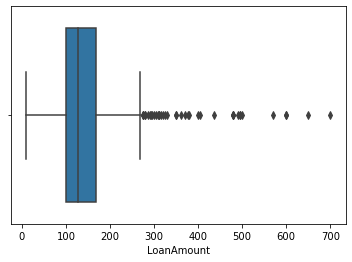

In [15]:
sns.boxplot(x='LoanAmount',data=dataset)

In [16]:
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())

<AxesSubplot:xlabel='Loan_Amount_Term'>

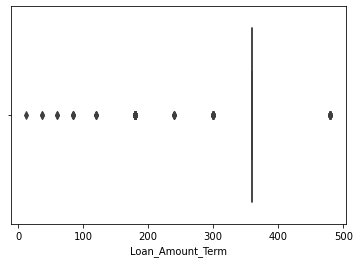

In [17]:
sns.boxplot(x='Loan_Amount_Term',data=dataset)

In [18]:
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median())

<AxesSubplot:xlabel='Credit_History'>

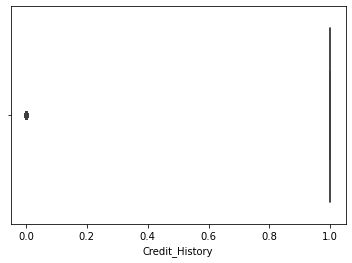

In [19]:
sns.boxplot(x='Credit_History',data=dataset)

In [20]:
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].median())

In [21]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# Drop Loan_ID
dataset=dataset.drop(['Loan_ID'],axis=1)

In [23]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
# Encoding
dataset['Gender']=dataset['Gender'].astype('category')
dataset['Gender']=dataset['Gender'].cat.codes

dataset['Married']=dataset['Married'].astype('category')
dataset['Married']=dataset['Married'].cat.codes

dataset['Dependents']=dataset['Dependents'].astype('category')
dataset['Dependents']=dataset['Dependents'].cat.codes

dataset['Education']=dataset['Education'].astype('category')
dataset['Education']=dataset['Education'].cat.codes

dataset['Self_Employed']=dataset['Self_Employed'].astype('category')
dataset['Self_Employed']=dataset['Self_Employed'].cat.codes

dataset['Property_Area']=dataset['Property_Area'].astype('category')
dataset['Property_Area']=dataset['Property_Area'].cat.codes

dataset['Loan_Status']=dataset['Loan_Status'].astype('category')
dataset['Loan_Status']=dataset['Loan_Status'].cat.codes

In [25]:
dataset=pd.get_dummies(dataset,columns=['Dependents','Property_Area'])

In [26]:
dataset=dataset.drop(['Dependents_0','Property_Area_0'],axis=1)

In [27]:
dataset.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3,Property_Area_1,Property_Area_2
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [38]:
x=dataset.drop(['Loan_Status'],axis=1)
y=dataset['Loan_Status']

In [39]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

# Support Vector Machine

In [40]:
from sklearn.svm import SVC

In [41]:
# Kernel=Linear
classifier_svm_linear=SVC(kernel='linear')
classifier_svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [43]:
y_pred_train_lr=classifier_svm_linear.predict(x_train)
y_pred_test_lr=classifier_svm_linear.predict(x_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
print('Classification Report of Train dataset:\n',classification_report(y_train,y_pred_train_lr))
print('####'*20)
print('Classification Report of Test dataset:\n',classification_report(y_test,y_pred_test_lr))

Classification Report of Train dataset:
               precision    recall  f1-score   support

           0       0.91      0.24      0.38       132
           1       0.76      0.99      0.86       328

    accuracy                           0.78       460
   macro avg       0.84      0.62      0.62       460
weighted avg       0.81      0.78      0.73       460

################################################################################
Classification Report of Test dataset:
               precision    recall  f1-score   support

           0       0.91      0.17      0.28        60
           1       0.65      0.99      0.78        94

    accuracy                           0.67       154
   macro avg       0.78      0.58      0.53       154
weighted avg       0.75      0.67      0.59       154



In [46]:
print('Confusion Matrix of Train dataset:\n',confusion_matrix(y_train,y_pred_train_lr))
print('####'*20)
print('Confusion Matrix of Test dataset:\n',confusion_matrix(y_test,y_pred_test_lr))

Confusion Matrix of Train dataset:
 [[ 32 100]
 [  3 325]]
################################################################################
Confusion Matrix of Test dataset:
 [[10 50]
 [ 1 93]]


In [48]:
print('Accuracy Score of Train dataset:',accuracy_score(y_train,y_pred_train_lr))
print('####'*20)
print('Accuracy Score of Test dataset:',accuracy_score(y_test,y_pred_test_lr))

Accuracy Score of Train dataset: 0.7760869565217391
################################################################################
Accuracy Score of Test dataset: 0.6688311688311688


In [49]:
# Kernel=Sigmoid
classifier_svm_sigmoid=SVC(kernel='sigmoid')
classifier_svm_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [50]:
y_pred_train_sg=classifier_svm_sigmoid.predict(x_train)
y_pred_test_sg=classifier_svm_sigmoid.predict(x_test)

In [51]:
print('Classification Report of Train dataset:\n',classification_report(y_train,y_pred_train_sg))
print('####'*20)
print('Classification Report of Test dataset:\n',classification_report(y_test,y_pred_test_sg))

Classification Report of Train dataset:
               precision    recall  f1-score   support

           0       0.29      0.20      0.24       132
           1       0.71      0.80      0.75       328

    accuracy                           0.63       460
   macro avg       0.50      0.50      0.50       460
weighted avg       0.59      0.63      0.60       460

################################################################################
Classification Report of Test dataset:
               precision    recall  f1-score   support

           0       0.41      0.18      0.25        60
           1       0.61      0.83      0.71        94

    accuracy                           0.58       154
   macro avg       0.51      0.51      0.48       154
weighted avg       0.53      0.58      0.53       154



In [52]:
print('Confusion Matrix of Train dataset:\n',confusion_matrix(y_train,y_pred_train_sg))
print('####'*20)
print('Confusion Matrix of Test dataset:\n',confusion_matrix(y_test,y_pred_test_sg))

Confusion Matrix of Train dataset:
 [[ 27 105]
 [ 67 261]]
################################################################################
Confusion Matrix of Test dataset:
 [[11 49]
 [16 78]]


In [53]:
print('Accuracy Score of Train dataset:',accuracy_score(y_train,y_pred_train_sg))
print('####'*20)
print('Accuracy Score of Test dataset:',accuracy_score(y_test,y_pred_test_sg))

Accuracy Score of Train dataset: 0.6260869565217392
################################################################################
Accuracy Score of Test dataset: 0.577922077922078


In [54]:
# Kernel=Polynomial
classifier_svm_poly=SVC(kernel='poly')
classifier_svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [56]:
y_pred_train_poly=classifier_svm_poly.predict(x_train)
y_pred_test_poly=classifier_svm_poly.predict(x_test)

In [57]:
print('Classification Report of Train dataset:\n',classification_report(y_train,y_pred_train_poly))
print('####'*20)
print('Classification Report of Test dataset:\n',classification_report(y_test,y_pred_test_poly))

Classification Report of Train dataset:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       132
           1       0.71      1.00      0.83       328

    accuracy                           0.72       460
   macro avg       0.86      0.50      0.42       460
weighted avg       0.80      0.72      0.60       460

################################################################################
Classification Report of Test dataset:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.61      1.00      0.76        94

    accuracy                           0.61       154
   macro avg       0.31      0.50      0.38       154
weighted avg       0.37      0.61      0.46       154



In [58]:
print('Confusion Matrix of Train dataset:\n',confusion_matrix(y_train,y_pred_train_poly))
print('####'*20)
print('Confusion Matrix of Test dataset:\n',confusion_matrix(y_test,y_pred_test_poly))

Confusion Matrix of Train dataset:
 [[  1 131]
 [  0 328]]
################################################################################
Confusion Matrix of Test dataset:
 [[ 0 60]
 [ 0 94]]


In [59]:
print('Accuracy Score of Train dataset:',accuracy_score(y_train,y_pred_train_poly))
print('####'*20)
print('Accuracy Score of Test dataset:',accuracy_score(y_test,y_pred_test_poly))

Accuracy Score of Train dataset: 0.7152173913043478
################################################################################
Accuracy Score of Test dataset: 0.6103896103896104


In [61]:
# Kernel=RBF
classifier_svm_rbf=SVC(kernel='rbf')
classifier_svm_rbf.fit(x_train,y_train)

SVC()

In [62]:
y_pred_train_rbf=classifier_svm_rbf.predict(x_train)
y_pred_test_rbf=classifier_svm_rbf.predict(x_test)

In [63]:
print('Classification Report of Train dataset:\n',classification_report(y_train,y_pred_train_rbf))
print('####'*20)
print('Classification Report of Test dataset:\n',classification_report(y_test,y_pred_test_rbf))

Classification Report of Train dataset:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       132
           1       0.71      1.00      0.83       328

    accuracy                           0.72       460
   macro avg       0.86      0.50      0.42       460
weighted avg       0.80      0.72      0.60       460

################################################################################
Classification Report of Test dataset:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.61      1.00      0.76        94

    accuracy                           0.61       154
   macro avg       0.31      0.50      0.38       154
weighted avg       0.37      0.61      0.46       154



In [64]:
print('Confusion Matrix of Train dataset:\n',confusion_matrix(y_train,y_pred_train_rbf))
print('####'*20)
print('Confusion Matrix of Test dataset:\n',confusion_matrix(y_test,y_pred_test_rbf))

Confusion Matrix of Train dataset:
 [[  1 131]
 [  0 328]]
################################################################################
Confusion Matrix of Test dataset:
 [[ 0 60]
 [ 0 94]]


In [65]:
print('Accuracy Score of Train dataset:',accuracy_score(y_train,y_pred_train_rbf))
print('####'*20)
print('Accuracy Score of Test dataset:',accuracy_score(y_test,y_pred_test_rbf))

Accuracy Score of Train dataset: 0.7152173913043478
################################################################################
Accuracy Score of Test dataset: 0.6103896103896104


# Cross Validation 

In [67]:
from sklearn.model_selection import cross_val_score
accuracy_train=cross_val_score(classifier_svm_linear,x_train,y_train,cv=10)
accuracy_test=cross_val_score(classifier_svm_linear,x_test,y_test,cv=10)
print('Accuracy Score of Train dataset:\n',accuracy_train)
print('####'*20)
print('Accuracy Score of Test dataset:\n',accuracy_test)

Accuracy Score of Train dataset:
 [0.82608696 0.73913043 0.73913043 0.7173913  0.76086957 0.80434783
 0.82608696 0.76086957 0.80434783 0.7826087 ]
################################################################################
Accuracy Score of Test dataset:
 [0.4375     0.625      0.6875     0.4375     0.53333333 0.66666667
 0.46666667 0.6        0.53333333 0.8       ]


# Grid Search CV

In [68]:
from sklearn.model_selection import GridSearchCV

In [72]:
# Creating a dictionary called param_grid and fill out some parameters for C and gamma

param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid=GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(x_train,y_train)
grid_predict_train=grid.predict(x_train)
grid_predict_test=grid.predict(x_test)

print('Accuracy Score of Train dataset:',accuracy_score(y_train,grid_predict_train))
print('####'*20)
print('Accuracy Score of Test dataset:',accuracy_score(y_test,grid_predict_test))
print('\n')
print(f'Best Tuned Hyperparameter k: {grid.best_params_}')

Accuracy Score of Train dataset: 0.7130434782608696
################################################################################
Accuracy Score of Test dataset: 0.6103896103896104


Best Tuned Hyperparameter k: {'C': 0.1, 'gamma': 1}


In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear','sigmoid','rbf','poly']}
grid=GridSearchCV(SVC(),param_grid,refit=True,cv=10)
grid.fit(x_train,y_train)
grid_predict_train=grid.predict(x_train)
grid_predict_test=grid.predict(x_test)

print('Accuracy Score of Train dataset:',accuracy_score(y_train,grid_predict_train))
print('####'*20)
print('Accuracy Score of Test dataset:',accuracy_score(y_test,grid_predict_test))
print('\n')
print(f'Best Tuned Hyperparameter k: {grid.best_params_}')